# Imports

In [1]:
!pwd
import sys
import os
import shutil

from bumps.names import *
from bumps.dream.state import load_state
import matplotlib.pyplot as plt

from molgroups.support import molstat
from molgroups.infotheory import entropy

# always use the same testdata
shutil.copyfile('./bu/sim.dat', os.getcwd()+'/sim.dat')

/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/entropy_gridsearch_sequential_execution/SANS/EllipsoidProtein_Single_Dataset


'/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/entropy_gridsearch_sequential_execution/SANS/EllipsoidProtein_Single_Dataset/sim.dat'

# Create Short Example Fit

In [2]:
%%writefile sansprot.py
import numpy

from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data

# IMPORT THE DATA USED
data = load_data('sim.dat')

#setattr(data, 'qmin', 0.01)
#setattr(data, 'qmax', 10.0)

# DEFINE THE MODEL
kernel = load_model('ellipsoid@hayter_msa')

pars = dict(scale=1.0, background=0.0005, sld=3.4, sld_solvent=6.4, radius_polar=14.0,
            radius_equatorial=12.0, volfraction=0.075, charge=5, temperature=298.0,
            concentration_salt=0.150, dielectconst=71.08)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
# model.scale.range(0.1, 7.)
# model.background.range(0, 1)
# model.sld.range(-2, 10)
# model.sld_solvent.range(0, 5)
model.radius_polar.range(17, 35)
model.radius_equatorial.range(5, 17)
model.volfraction.range(0.0001,0.02)
# model.charge.range(0, 20)
# model.temperature.range(0, 1000)
# model.concentration_salt.range(0, 1)
# model.dielectconst.range(0,100)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting sansprot.py


# Variables

In [3]:
#Example is from https://github.com/SasView/sasmodels/tree/master/example

store = "T"
setupdir = os.getcwd()
runfile = "sansprot"
fitsource = "SASView"

# remove store directory if it already exists, since we do not want to reload here
if os.path.isdir(os.path.join(setupdir, store)):
    shutil.rmtree(os.path.join(setupdir, store))

burn=1500
steps=500


# Setup Example Fit

In [4]:
fitobj = molstat.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    state=None,
    problem=None,
)

No file: /Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/entropy_gridsearch_sequential_execution/SANS/EllipsoidProtein_Single_Dataset/T/sansprot.py
No state to reload.


# steps: 500, # draws: 15000
step 1 cost 11.398(16)
                       radius_equatorial ..|.......    7.44302 in (5,17)
                            radius_polar ........|.    31.7147 in (17,35)
                             volfraction ..|....... 0.00424543 in (0.0001,0.02)
step 30 cost 0.751(16)
step 81 cost 0.701(16)
step 124 cost 0.683(16)
step 186 cost 0.683(16)
step 257 cost 0.683(16)
step 327 cost 0.683(16)
step 399 cost 0.682(16)
step 472 cost 0.682(16)
step 542 cost 0.682(16)
step 612 cost 0.682(16)
step 688 cost 0.682(16)
step 751 cost 0.682(16)
step 814 cost 0.682(16)
step 886 cost 0.682(16)
step 946 cost 0.682(16)
step 1010 cost 0.682(16)
.background = 0.0005
.charge = 5
.concentration_salt = 0.15
.dielectconst = 71.08
.phi = 60
.phi_pd = 0
.phi_pd_n = 35
.phi_pd_nsigma = 3
.radius_effective = 20.75
.radius_effective_mode = 1
.radius_effective_pd = 0
.radius_effective_pd_n = 35
.radius_effective_pd_nsigma = 3
.radius_equatorial = 13.077 in [5,17]
.radius_equatorial_pd = 

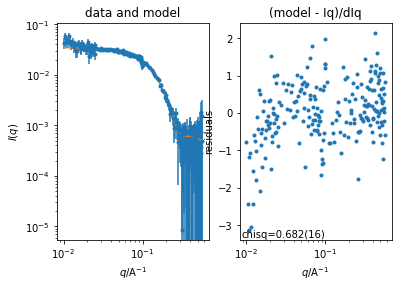

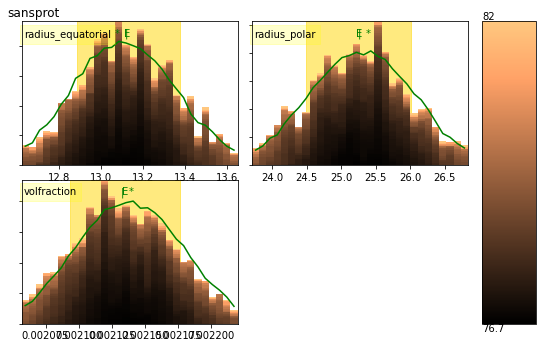

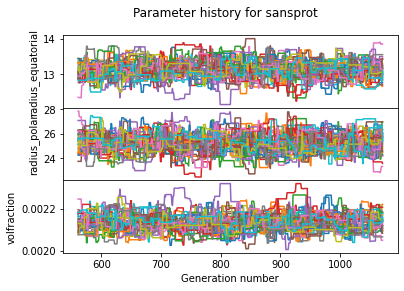

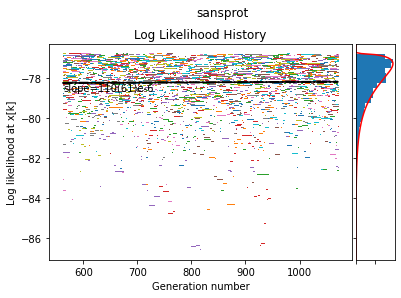

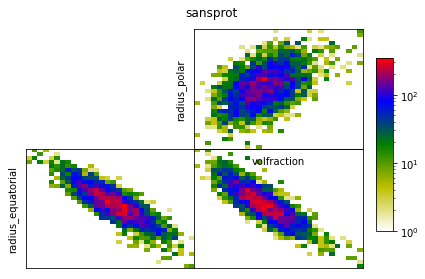

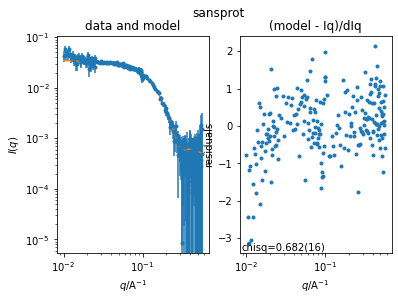

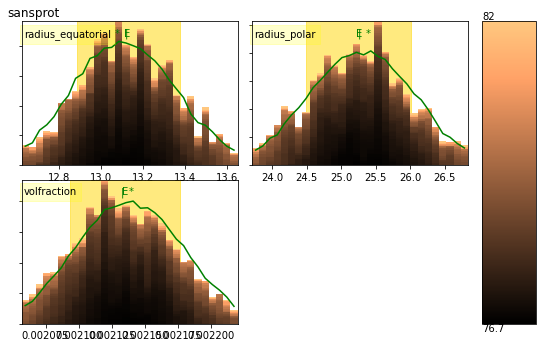

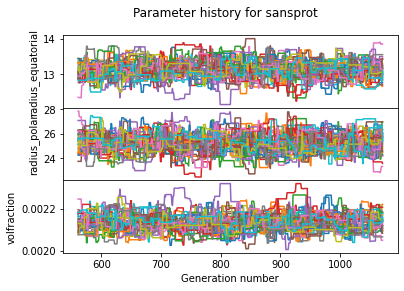

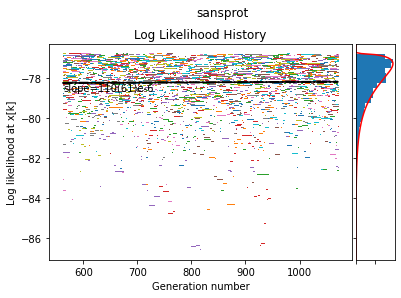

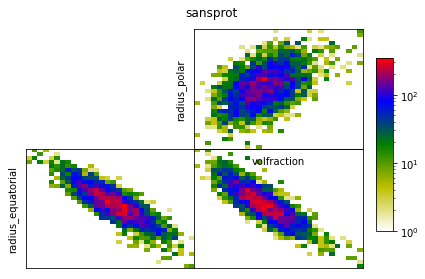

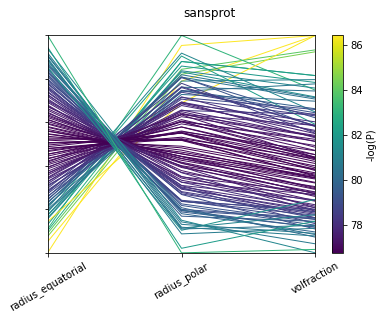

In [5]:
fitobj.Interactor.fnRunMCMC(burn, steps, batch=False)

In [6]:
%%writefile simpar.dat
radius_equatorial 13.094
radius_polar  25.359
volfraction  0.002137

Overwriting simpar.dat


In [108]:
sb = 0.059
configuration_dataset1 = [{'lambda': 6.21,
                            "sample_detector_distance": 100,
                            'source_sample_distance': 387.6,
                            'source_aperture_radius':5.08*0.5,
                            'sample_aperture_radius':1.27*0.5,
                            "beamstop_diameter": 10.16,
                            "neutron_flux": 9e5,
                            'time': 1600,
                            'beam_center_x': 25,
                            "dlambda_lambda":0.136,
                            "differential_cross_section_buffer": sb},
                          {'lambda': 6.21,
                           "sample_detector_distance": 400,
                           'source_sample_distance': 850.05,
                           'source_aperture_radius':5.08*0.5,
                           'sample_aperture_radius':1.27*0.5,
                           "beamstop_diameter": 10.16,
                           "neutron_flux": 2e5,
                           'time': 3600,
                           "dlambda_lambda":0.136,
                           "differential_cross_section_buffer": sb},
                         {'lambda': 6.21,
                          "sample_detector_distance": 1300,
                          'source_sample_distance': 1467,
                          'source_aperture_radius':5.08*0.5,
                          'sample_aperture_radius':1.27*0.5,
                          "dlambda_lambda":0.136,
                          "beamstop_diameter": 10.16,
                          "neutron_flux": 1e5,
                          'time': 4400,
                          "differential_cross_section_buffer": sb}]

configuration = [configuration_dataset1]

fitobj.fnSimulateData(basefilename='sim.dat', liConfigurations=configuration)

radius_equatorial 13.094
radius_polar 25.359
volfraction 0.002137
radius_equatorial 13.094
radius_polar 25.359
volfraction 0.002137


Compare original and simulated data.

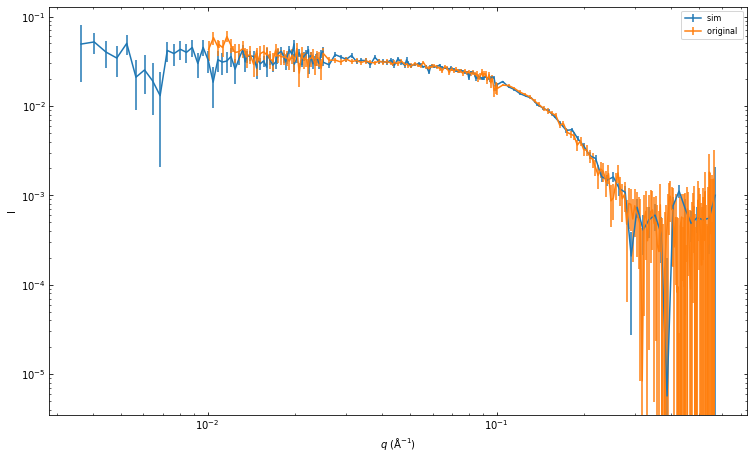

In [109]:
import pandas

fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim.dat', sep=' ', skip_blank_lines=True,comment='#')

ax.errorbar(simdata['Q'], simdata['I'], simdata['dI'], label="sim ")
ax.errorbar(original['Q'], original['I'], original['dI'], label="original ")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(1e-2, .1)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


Compare the simulated uncertainties. The ratio of the simulated over the original relative uncertainties is calculated.

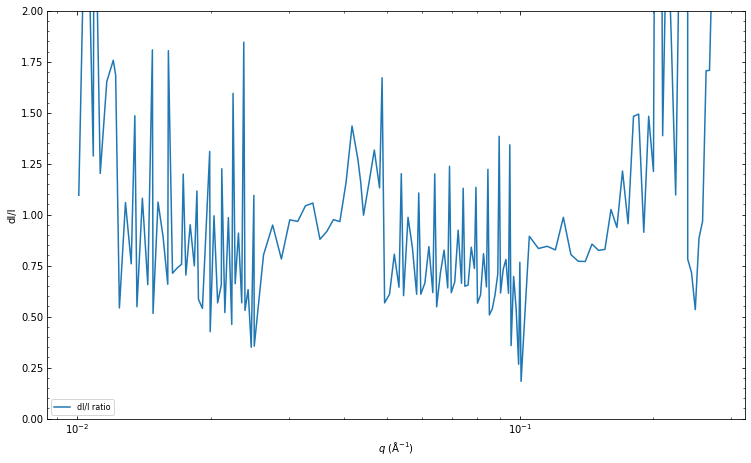

In [110]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim.DAT', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim.DAT', sep=' ', skip_blank_lines=True,comment='#')

import numpy
qsim = numpy.array(simdata['Q'])
qsim = numpy.abs(qsim-original['Q'].iloc[0])
istart = numpy.argmin(qsim)
length = len(numpy.array(original['Q']))
iend = istart + length
if iend > len(numpy.array(simdata['Q'])):
    iend = len(numpy.array(simdata['Q']))
simdI = numpy.array(simdata['dI'].iloc[istart:iend])
simI =  numpy.array(simdata['I'].iloc[istart:iend])
length = iend - istart
originaldI = numpy.array(original['dI'].iloc[:length])
originalI = numpy.array(original['I'].iloc[:length])
originalQ = numpy.array(original['Q'].iloc[:length])

ax.plot(originalQ, (simdI/simI)/(originaldI/originalI), label="dI/I ratio")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("dI/I", fontsize=10)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
ax.set_ylim(0, 2)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


Compare the simulated and original relative Q-resolution dQ/Q as a ratio of simulated over original.

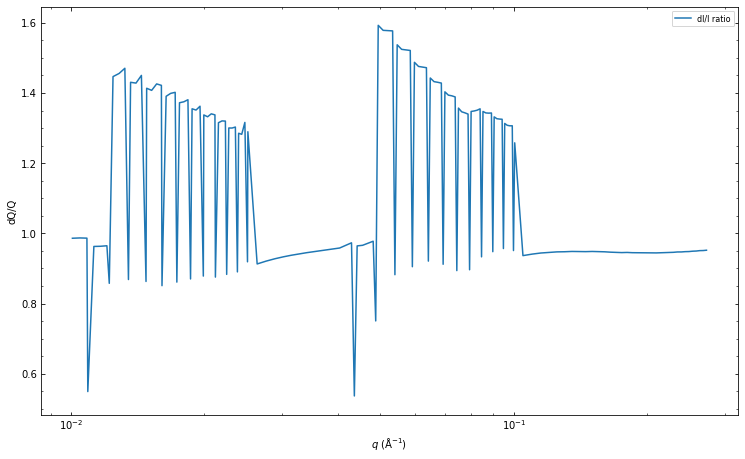

In [111]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim.DAT', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim.DAT', sep=' ', skip_blank_lines=True,comment='#')

import numpy
qsim = numpy.array(simdata['Q'])
qsim = numpy.abs(qsim-original['Q'].iloc[0])
istart = numpy.argmin(qsim)
length = len(numpy.array(original['Q']))
iend = istart + length
if iend > len(numpy.array(simdata['Q'])):
    iend = len(numpy.array(simdata['Q']))
simdQ = numpy.array(simdata['dQ'].iloc[istart:iend])
simQ =  numpy.array(simdata['Q'].iloc[istart:iend])
length = iend - istart
originaldQ = numpy.array(original['dQ'].iloc[:length])
originalQ = numpy.array(original['Q'].iloc[:length])

ax.plot(originalQ, (simdQ/simQ)/(originaldQ/originalQ), label="dI/I ratio")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("dQ/Q", fontsize=10)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(0, 2)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


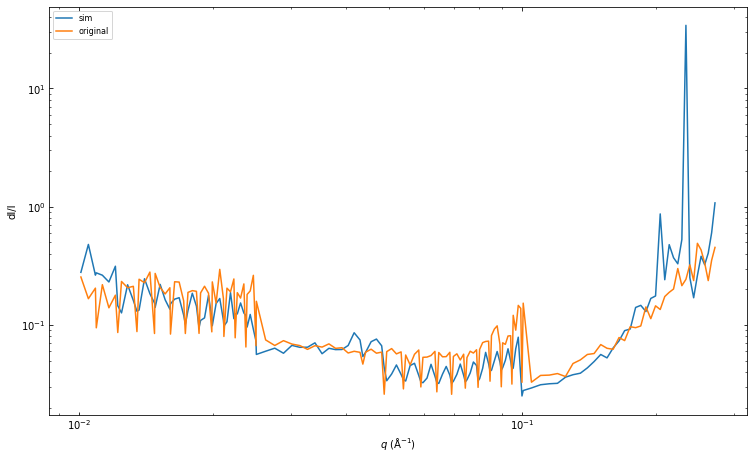

In [112]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim.DAT', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim.DAT', sep=' ', skip_blank_lines=True,comment='#')

import numpy
qsim = numpy.array(simdata['Q'])
qsim = numpy.abs(qsim-original['Q'].iloc[0])
istart = numpy.argmin(qsim)
length = len(numpy.array(original['Q']))
iend = istart + length
if iend > len(numpy.array(simdata['Q'])):
    iend = len(numpy.array(simdata['Q']))
simdI = numpy.array(simdata['dI'].iloc[istart:iend])
simI =  numpy.array(simdata['I'].iloc[istart:iend])
length = iend - istart
originaldI = numpy.array(original['dI'].iloc[:length])
originalI = numpy.array(original['I'].iloc[:length])
originalQ = numpy.array(original['Q'].iloc[:length])

ax.plot(originalQ, (simdI/simI), label="sim")
ax.plot(originalQ, (originaldI/originalI), label="original")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("dI/I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(0, 2)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


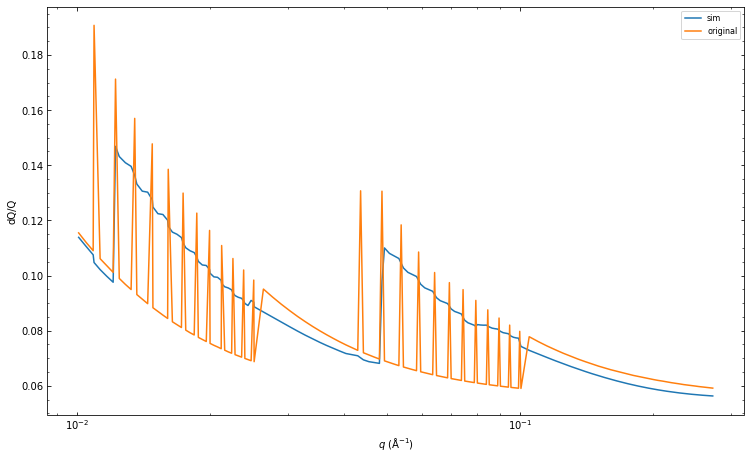

In [113]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim.DAT', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim.DAT', sep=' ', skip_blank_lines=True,comment='#')

import numpy
qsim = numpy.array(simdata['Q'])
qsim = numpy.abs(qsim-original['Q'].iloc[0])
istart = numpy.argmin(qsim)
length = len(numpy.array(original['Q']))
iend = istart + length
if iend > len(numpy.array(simdata['Q'])):
    iend = len(numpy.array(simdata['Q']))
simdQ = numpy.array(simdata['dQ'].iloc[istart:iend])
simQ =  numpy.array(simdata['Q'].iloc[istart:iend])
length = iend - istart
originaldQ = numpy.array(original['dQ'].iloc[:length])
originalQ = numpy.array(original['Q'].iloc[:length])

ax.plot(originalQ, (simdQ/simQ), label="sim")
ax.plot(originalQ, (originaldQ/originalQ), label="original")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("dQ/Q", fontsize=10)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(0, 2)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


# Experimental Optimization

* Entropypar.dat contains a list of all fit parameters with a designation, whether they are marginal (d) or nuisance (i) parameters. This is followed by the parameter name, the initial parameter value, and the fit boundaries.
* Configuration parameters are given by a preceeding nxy, where x is the data set it applies to and y the configuration number. Not giving any xy makes this parameter apply to all configurations, as does passing a '*' in place of either x or y.
* Any number xy following a fit parameter indicates that this paramter is used for this particular dataset/configuration to determine the background (incoherent cross section). This typically applies to SLDs. The 'mode' argument for entropy.Entropy() then determines whether this is to be interpreted as an aqueous solvent or other.
* If three more numbers are given, this designates that an information content search over this parameter is performed (start, stop, step).
* A preceding f (fi or fd) at the beginning of the line indicates that the fit boundaries for such a search parameter are fixed (for example for volume fractions between 0 and 1), otherwise the fit boundary moves according to the varied parameter and the initally given fit boundaries.
* Any theta offset currently needs to have an initial value of zero. Otherwise refl1d will shift the q-values during data simulation with unexpected outcomes.
* If an instrumental parameter is specified for one data set, the instrumental parameter needs to be specified for all other datasets, as well.
* Data filenames are currently limited to sim.dat for a single file fit, or simx.dat, x = 0 ... n, for fits with multiple data sets

In [14]:
text = ['d * * radius_equatorial 11 5 17',
        'd * * radius_polar  20 17 35',
        'i * * volfraction  0.01 0.0001 0.02',
        'n * * lambda 6',
        'n * * differential_cross_section_buffer 0.059',
        'n * 0 detector_sample_distance 100',
        'n * 1 detector_sample_distance 400',
        'n * 2 detector_sample_distance 1300',
        'n * 0 time 1600',
        'n * 1 time 3600',
        'n * 2 time 4400',
        'n * 0 beam_center_x 26.416',
        'fn * * cuvette_thickness 0.2 0 0 0.1 4.1 0.25'
        ]

f=open('entropypar.dat', 'w')
f.writelines(line + '\n' for line in text)
f.close()

In [20]:
# general fit setup
setupdir = os.getcwd()
runfile = "sansprot"
store = 'T'
fitsource = "SASView"

# particular entropy setup
burn = 5000
steps = 500
convergence = 2.0
miniter = 3
mode = 'water'
bClusterMode = False
bFetchMode = False
time = 2
bcalcsymmetric = True
upper_info_plotlevel = None
plotlimits_filename = ""
calcsingle = False

# setup batchscript for SLURM (if used)
script = ['#!/bin/bash\n',
          '#SBATCH --job-name=entro {mcmc_iteration}\n',
          '#SBATCH -A mc4s9np\n', '#SBATCH -p RM\n',
          '#SBATCH -t 0' + str(time) + ':00:00\n',
          '#SBATCH -N 4\n', '#SBATCH --ntasks-per-node 28\n',
          '\n',
          'set +x\n',
          'cd $SLURM_SUBMIT_DIR\n',
          '\n',
          'module load python/2.7.11_gcc\n',
          'export PYTHONPATH=/home/hoogerhe/bin/lib/python2.7/site-packages:/home/hoogerhe/src/bumps\n',
          '\n',
          'mpirun -np 112 python /home/hoogerhe/src/refl1d/bin/refl1d_cli.py {mcmc_dirname}/run.py --fit=dream --mpi --init=lhs --batch --pop=28 --time='
          + str(float(time) - 0.1) + ' --thin=20 --store={mcmc_dirname}/save --burn=' + str(burn)
          + ' --steps=' + str(steps) + '\n'
          ]
# script.append('cd '+dirname+'\n')


In [21]:
entr = entropy.Entropy(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    mcmcburn=burn,
    mcmcsteps=steps,
    convergence=convergence,
    miniter=miniter,
    mode=mode,
    bClusterMode=bClusterMode,
    bFetchMode=bFetchMode,
    calc_symmetric=bcalcsymmetric,
    upper_info_plotlevel=upper_info_plotlevel,
    plotlimits_filename=plotlimits_filename,
    slurmscript=script
)

The optimization might be supplemented with qmin, qmax, and qrangefromfile attributes that are applied to all datasets. These are independent of qrange limitations imparted by individual SANS configurations. When the q-range is taken from file, the first dataset (0) will be used. In most cases, provide the default values given below.

radius_equatorial 11.0
radius_polar 20.0
volfraction 0.01
radius_equatorial 11.0
radius_polar 20.0
volfraction 0.01
# steps: 500, # draws: 15000
.background = 0.0005
.charge = 5
.concentration_salt = 0.15
.dielectconst = 71.08
.phi = 60
.phi_pd = 0
.phi_pd_n = 35
.phi_pd_nsigma = 3
.radius_effective = 20.75
.radius_effective_mode = 1
.radius_effective_pd = 0
.radius_effective_pd_n = 35
.radius_effective_pd_nsigma = 3
.radius_equatorial = 10.9987 in [5,17]
.radius_equatorial_pd = 0
.radius_equatorial_pd_n = 35
.radius_equatorial_pd_nsigma = 3
.radius_polar = 20.0218 in [17,35]
.radius_polar_pd = 0
.radius_polar_pd_n = 35
.radius_polar_pd_nsigma = 3
.scale = 1
.sld = 3.4
.sld_M0 = 0
.sld_mphi = 0
.sld_mtheta = 0
.sld_solvent = 6.4
.sld_solvent_M0 = 0
.sld_solvent_mphi = 0
.sld_solvent_mtheta = 0
.structure_factor_mode = 0
.temperature = 298
.theta = 60
.theta_pd = 0
.theta_pd_n = 35
.theta_pd_nsigma = 3
.up_angle = 0
.up_frac_f = 0
.up_frac_i = 0
.up_phi = 0
.volfraction = 0.00997115 in 

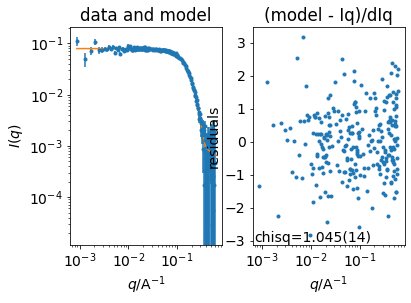

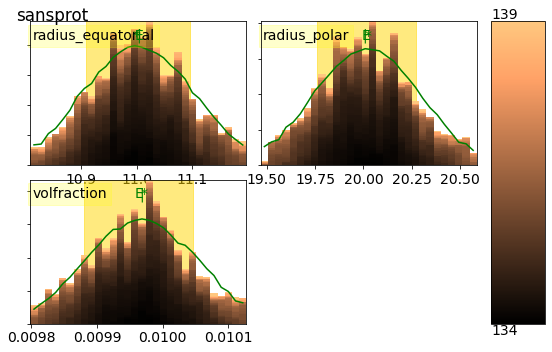

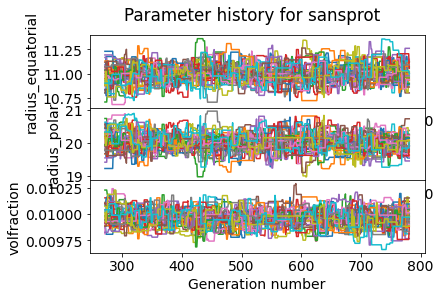

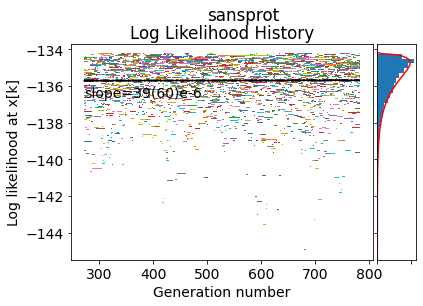

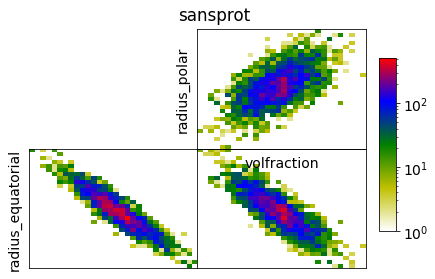

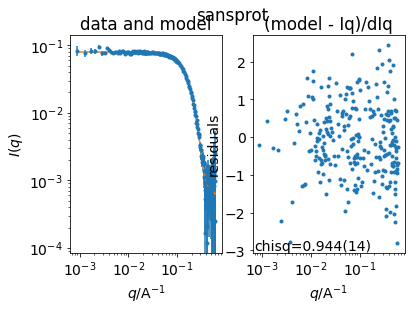

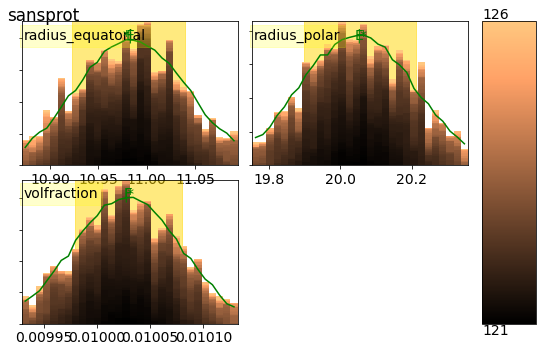

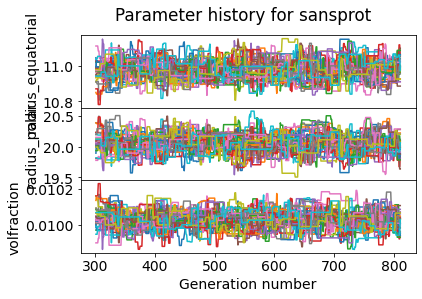

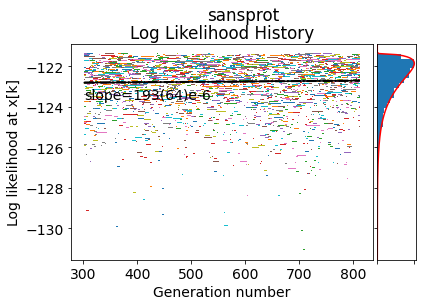

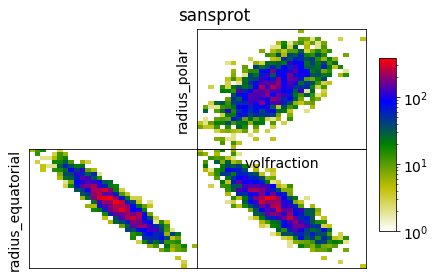

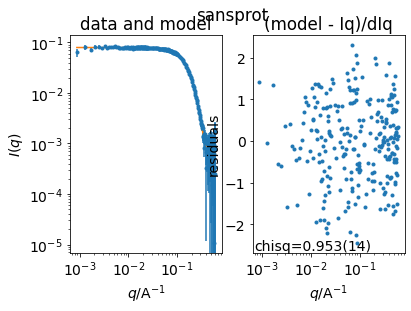

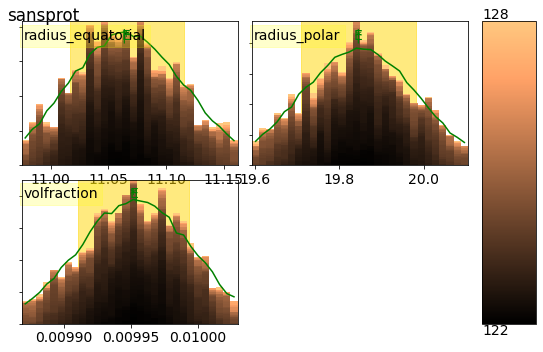

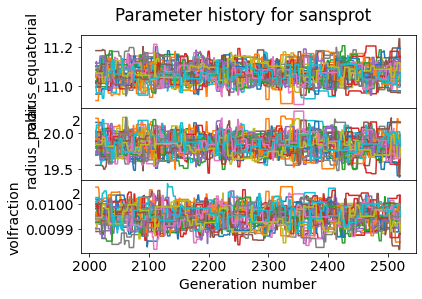

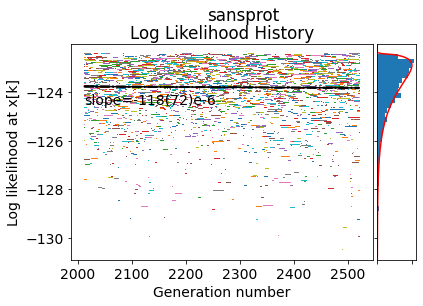

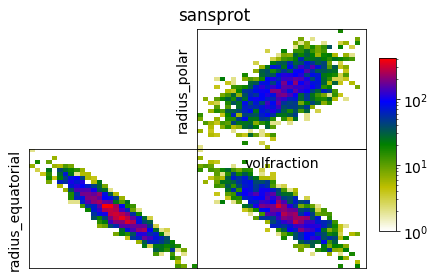

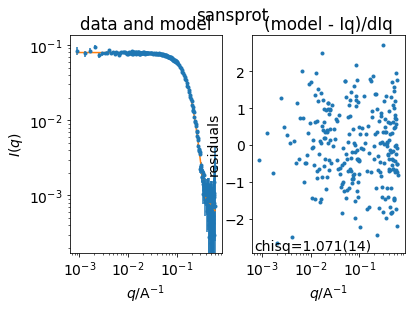

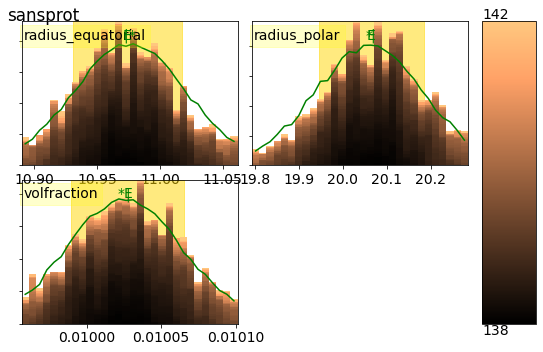

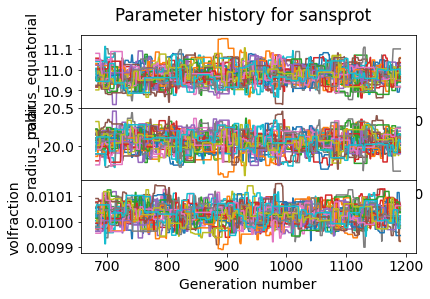

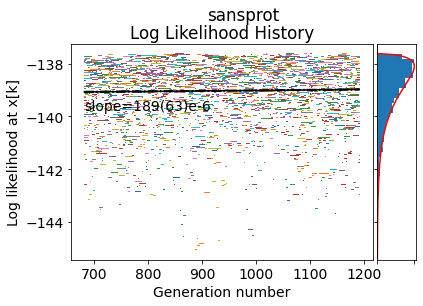

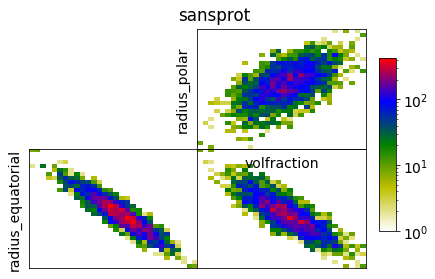

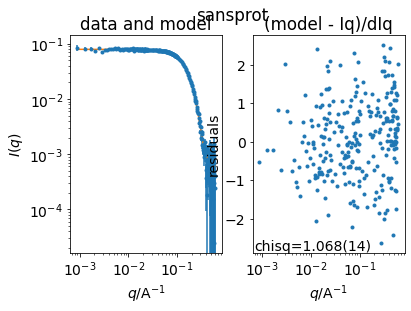

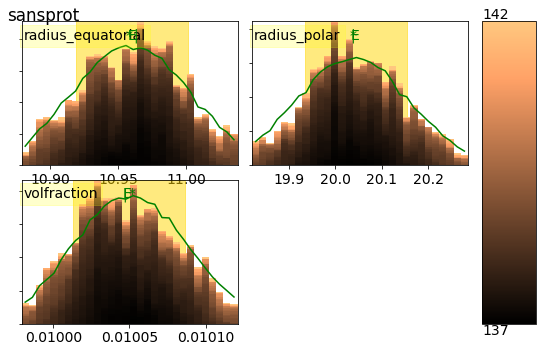

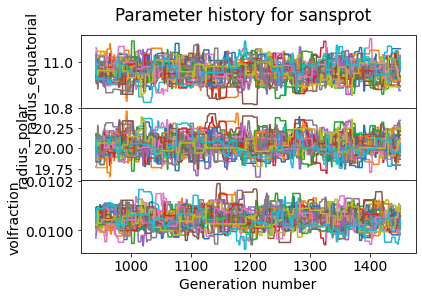

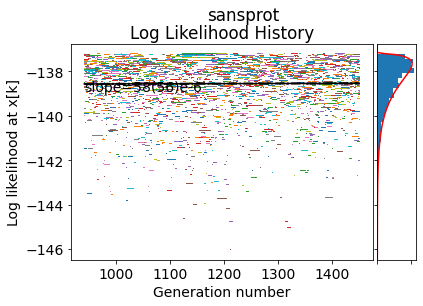

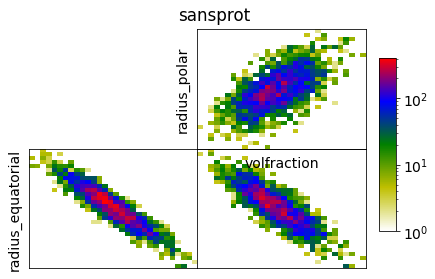

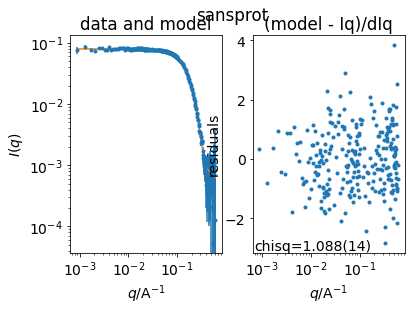

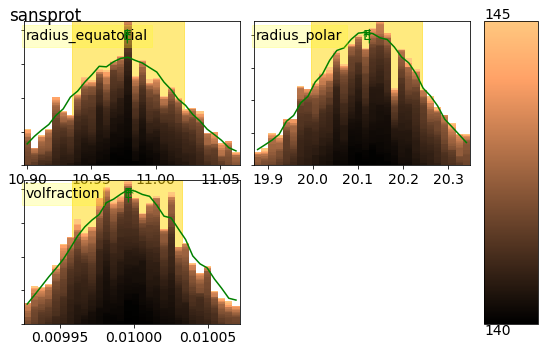

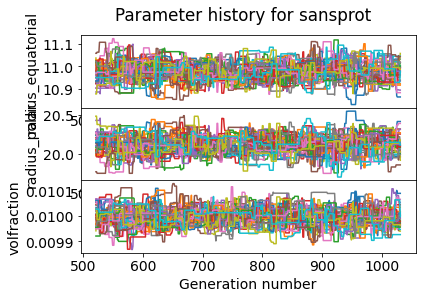

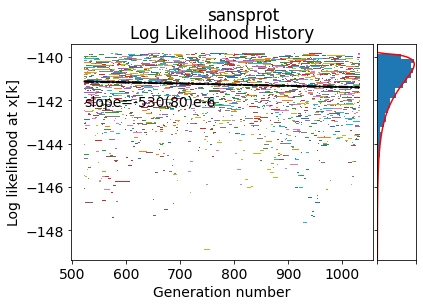

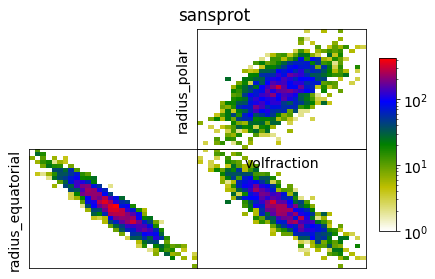

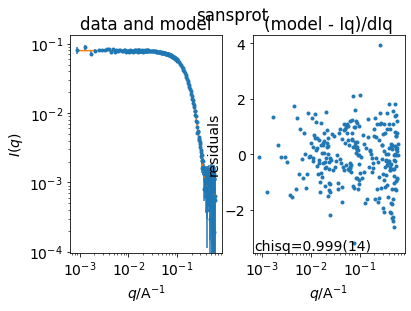

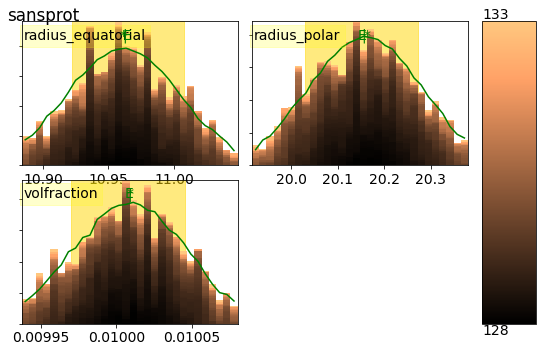

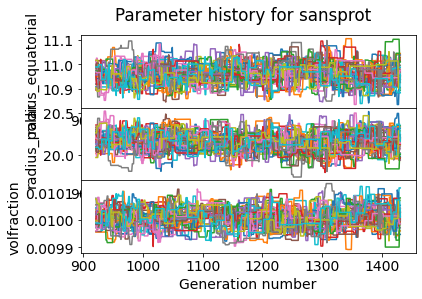

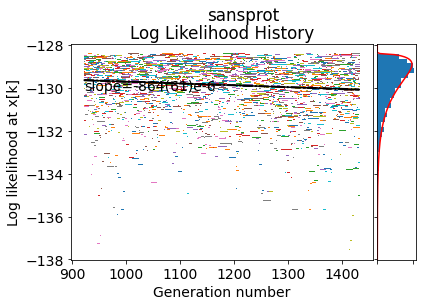

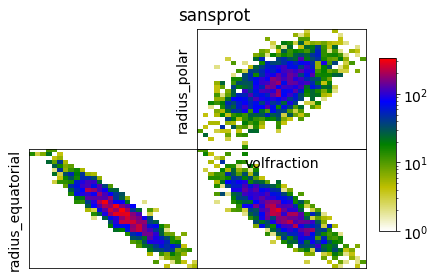

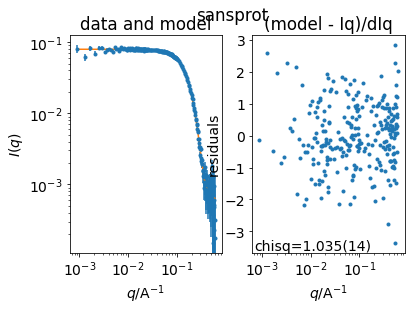

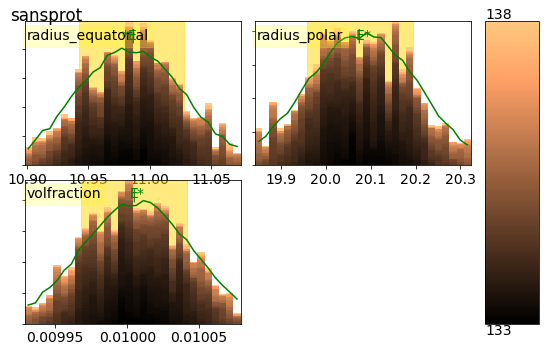

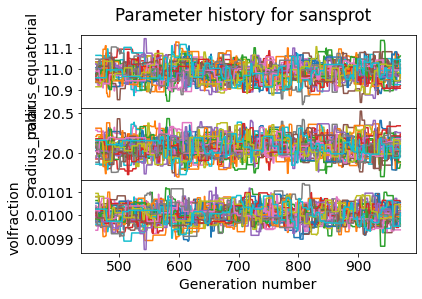

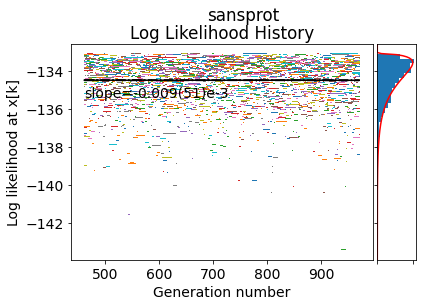

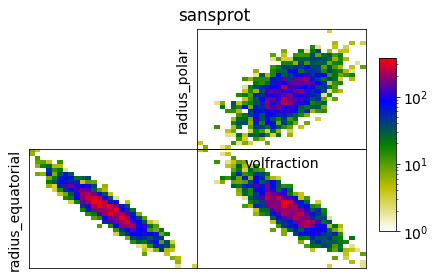

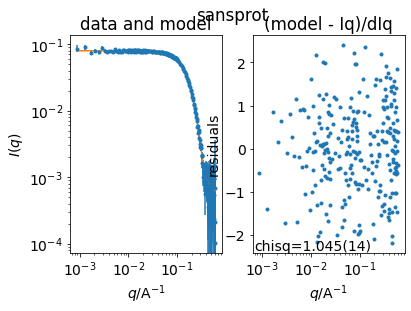

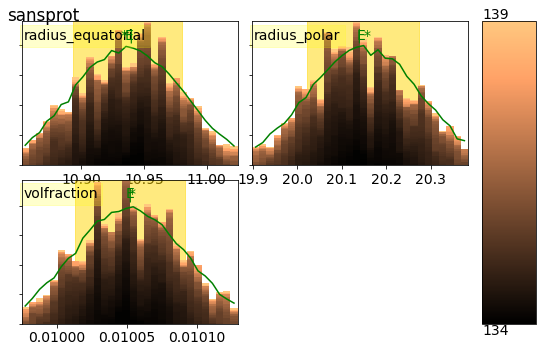

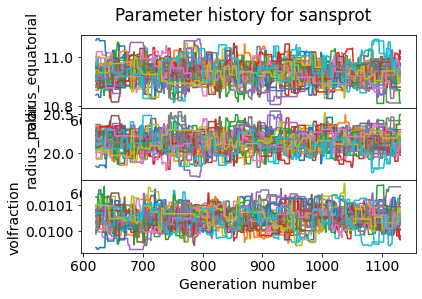

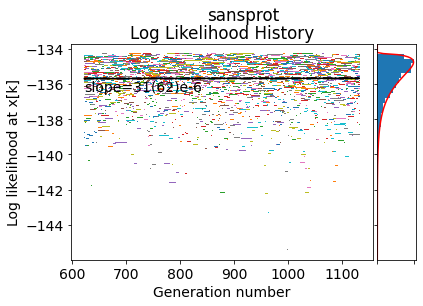

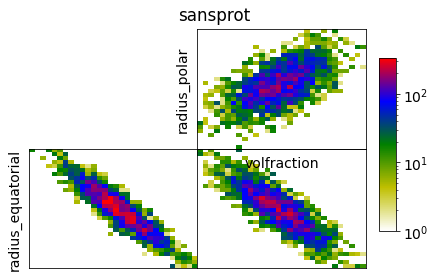

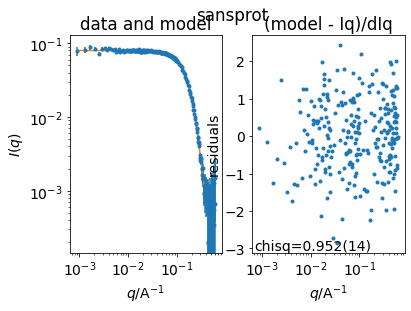

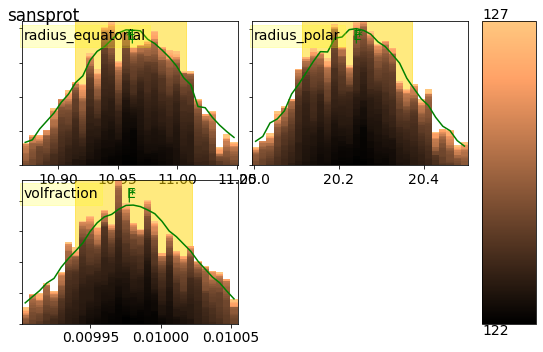

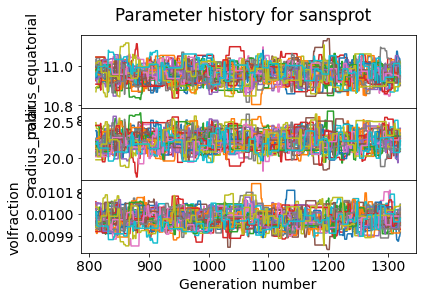

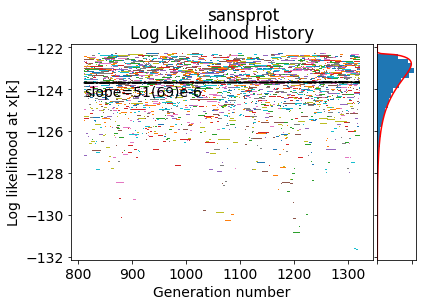

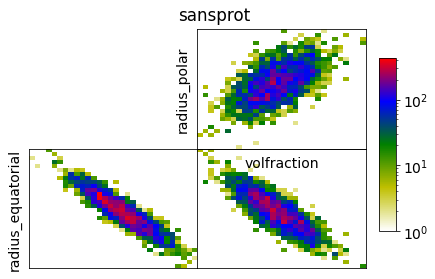

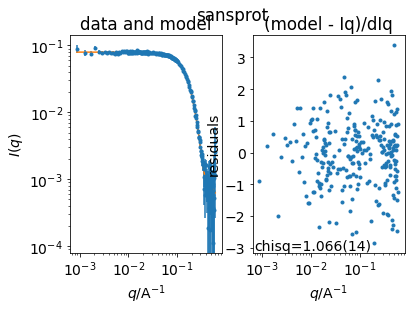

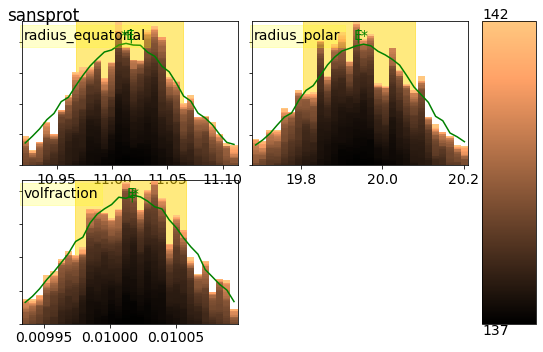

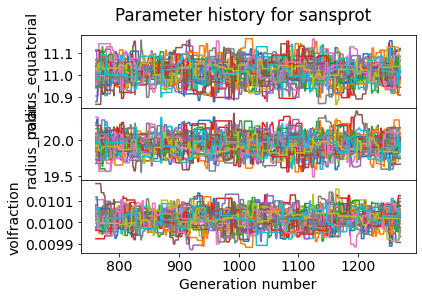

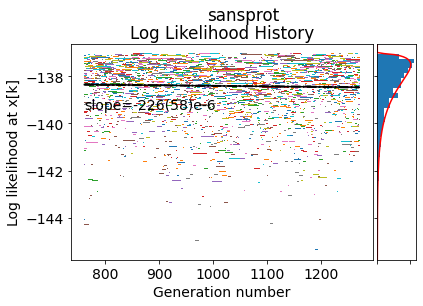

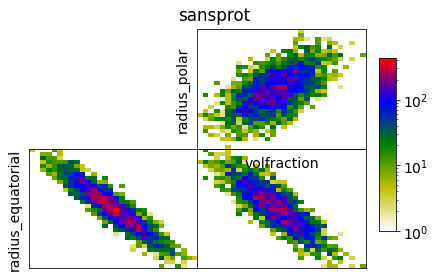

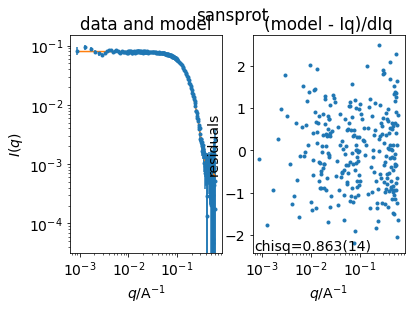

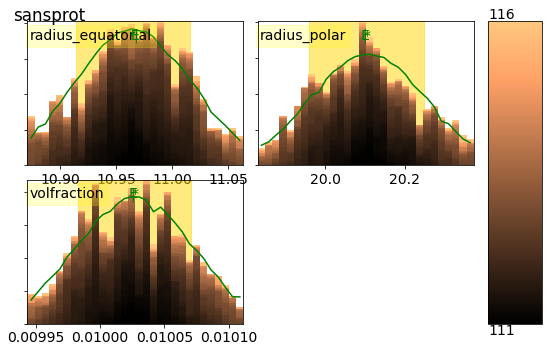

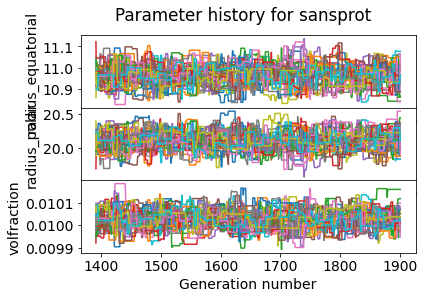

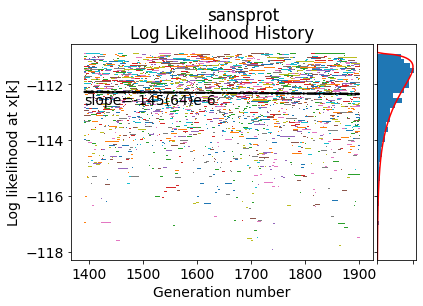

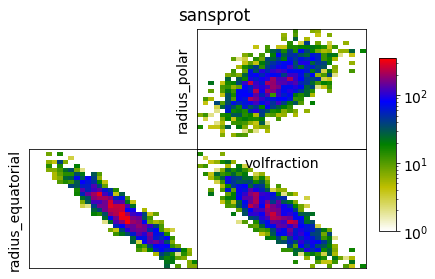

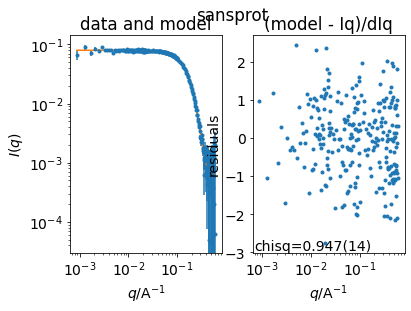

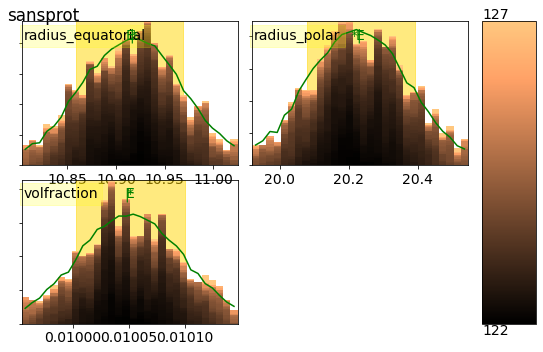

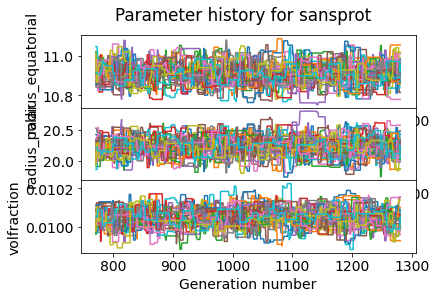

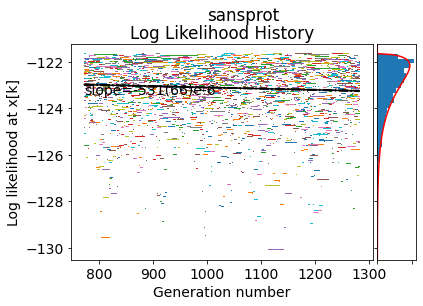

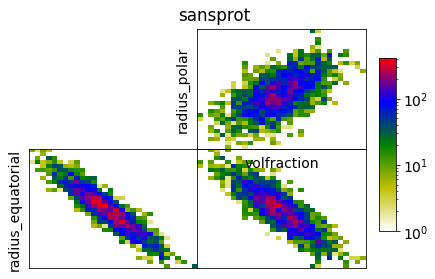

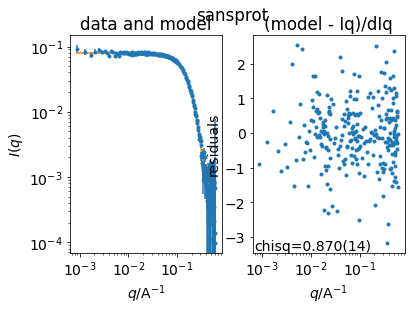

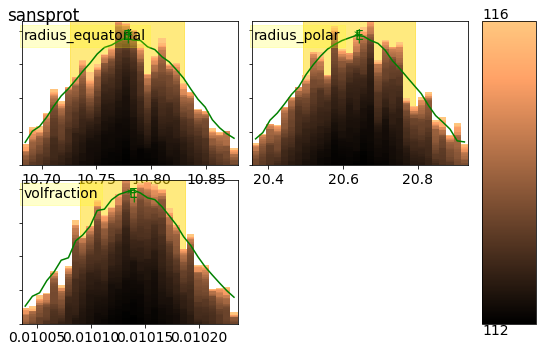

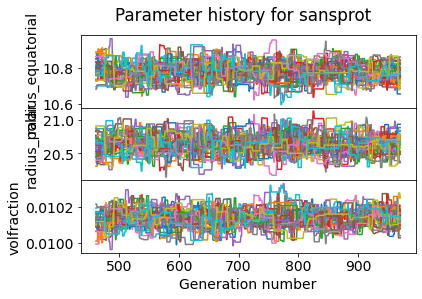

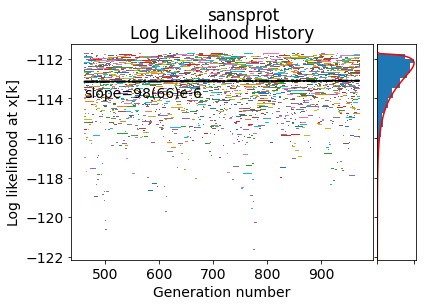

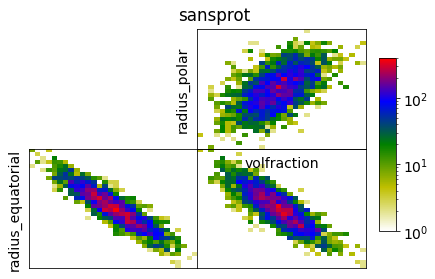

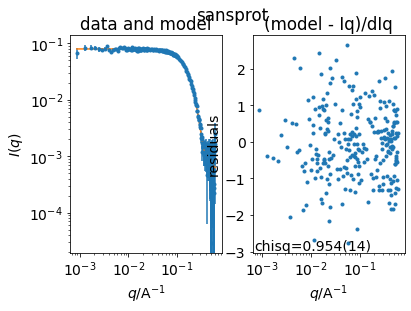

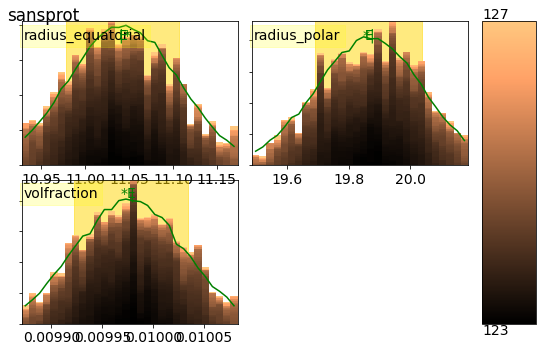

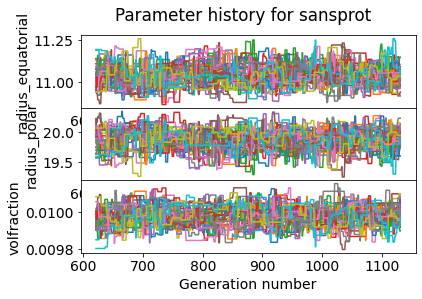

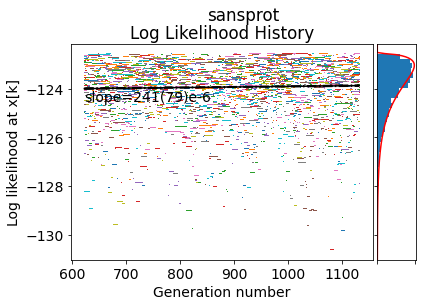

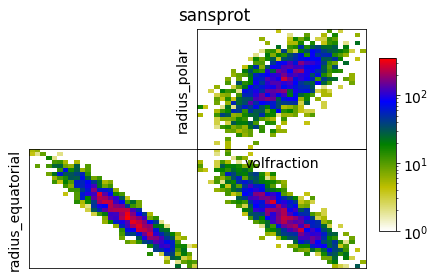

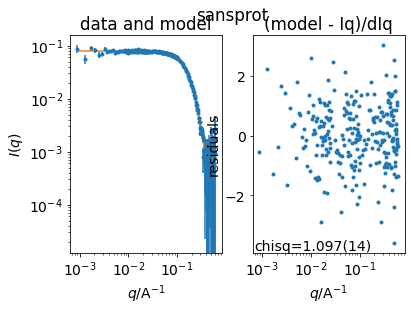

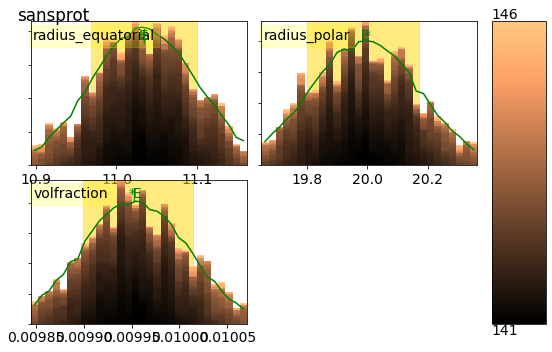

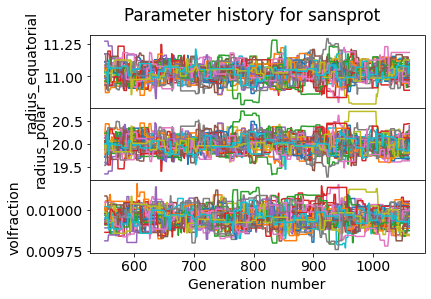

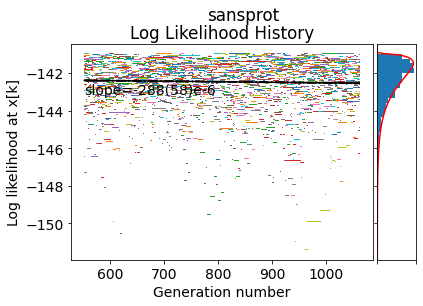

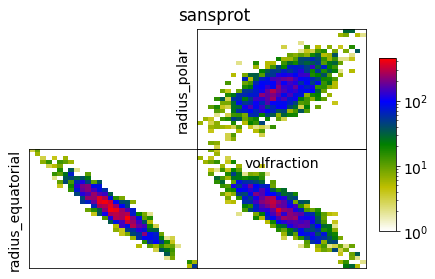

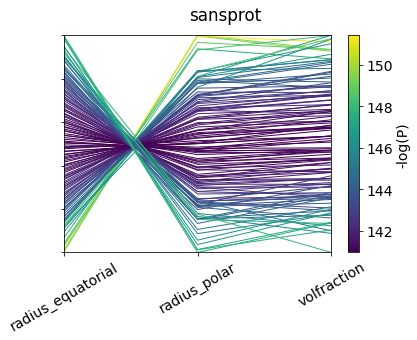

In [22]:
qmin = None
qmax = None
qrangefromfile = False
entr.run_optimization(qmin=qmin, qmax=qmax, qrangefromfile=qrangefromfile)

In [23]:
entr.plot_results()